In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [2]:
df = pd.read_csv('letter-recognition.csv')


In [3]:
# Set column names manually
df.columns = ['letter', 'x-box', 'y-box', 'width', 'height', 'onpix', 'x-bar',
              'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 
              'xegvy', 'y-ege', 'yegvx']


In [4]:
# Separate features and labels
X = df.drop('letter', axis=1)
y = df['letter']

In [5]:
# Encode labels (A-Z → 0-25)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [6]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

In [7]:
# Build the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(16,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(26, activation='softmax'))  # 26 classes

C:\Users\DIYA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3457 - loss: 2.4425 - val_accuracy: 0.6794 - val_loss: 1.0912
Epoch 2/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7176 - loss: 0.9896 - val_accuracy: 0.7619 - val_loss: 0.8313
Epoch 3/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7784 - loss: 0.7747 - val_accuracy: 0.7925 - val_loss: 0.6977
Epoch 4/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8048 - loss: 0.6633 - val_accuracy: 0.8156 - val_loss: 0.6198
Epoch 5/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8343 - loss: 0.5635 - val_accuracy: 0.8213 - val_loss: 0.5660
Epoch 6/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8471 - loss: 0.5157 - val_accuracy: 0.8350 - val_loss: 0.5190
Epoch 7/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8658 - loss: 0.4582 - val_accuracy: 0.8587 - val_loss: 0.4549
Epoch 8/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8795 - loss: 0.4052 - val_accuracy: 0.

In [10]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.9260


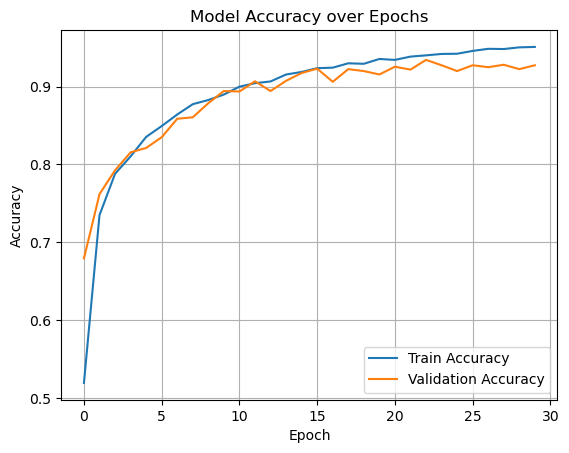

In [11]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()